# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

Importação de bibliotecas

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

Verificação da adequação de dataframe ao scikit-learn

In [73]:
df = pd.read_csv(r'.\output\dataframe_demonstração1.csv')

In [74]:
df.isna().sum()

Unnamed: 0                                0
sexo                                      0
posse_de_veiculo                          0
posse_de_imovel                           0
qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary special    0
estado_civil_Married                      0
estado_civil_Separated          

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Unnamed: 0                              6770 non-null   int64
 1   sexo                                    6770 non-null   int64
 2   posse_de_veiculo                        6770 non-null   int64
 3   posse_de_imovel                         6770 non-null   int64
 4   qtd_filhos                              6770 non-null   int64
 5   idade                                   6770 non-null   int64
 6   tempo_emprego                           6770 non-null   int64
 7   possui_celular                          6770 non-null   int64
 8   possui_fone_comercial                   6770 non-null   int64
 9   possui_fone                             6770 non-null   int64
 10  possui_email                            6770 non-null   int64
 11  qt_pessoas_reside

In [76]:
df

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,1,0,58,3,1,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,0,0,1,0,52,8,1,0,1,...,1,0,0,1,0,1,0,0,0,0
2,2,1,1,1,0,46,2,1,1,1,...,0,1,0,0,0,1,0,0,0,0
3,3,0,1,0,0,29,3,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,4,0,0,1,0,27,4,1,0,1,...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,6765,0,0,1,1,34,3,1,1,1,...,1,0,0,1,0,1,0,0,0,0
6766,6766,0,0,1,0,54,9,1,0,0,...,1,0,0,0,0,1,0,0,0,0
6767,6767,0,0,1,0,43,7,1,1,1,...,1,1,0,0,0,1,0,0,0,0
6768,6768,1,1,1,0,30,9,1,1,0,...,1,1,0,0,0,1,0,0,0,0


Criação de dataframe X e dataframe Y para separar as variáveis explicativas da 'target'

In [77]:
x = df.drop('mau', axis=1)

In [78]:
y = df['mau']

Separação de treinamento e teste em 70% e 30% respectivamente

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

Definição de objeto árvore e treinamento do mesmo

In [80]:
clf = DecisionTreeClassifier(random_state=100 )
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=100)

Vizualização da árvore

[Text(0.6668189613359202, 0.9761904761904762, 'Unnamed: 0 <= 6630.0\ngini = 0.085\nsamples = 4739\nvalue = [4528, 211]\nclass = aprovados'),
 Text(0.6623843715354767, 0.9285714285714286, 'tempo_emprego <= 4.5\ngini = 0.05\nsamples = 4646\nvalue = [4528, 118]\nclass = aprovados'),
 Text(0.6646016664356984, 0.9523809523809523, 'True  '),
 Text(0.43233352965631927, 0.8809523809523809, 'Unnamed: 0 <= 5031.5\ngini = 0.062\nsamples = 2556\nvalue = [2474, 82]\nclass = aprovados'),
 Text(0.27706658813747226, 0.8333333333333334, 'estado_civil_Widow <= 0.5\ngini = 0.048\nsamples = 1930\nvalue = [1883, 47]\nclass = aprovados'),
 Text(0.15723738913525498, 0.7857142857142857, 'Unnamed: 0 <= 1527.5\ngini = 0.041\nsamples = 1806\nvalue = [1768, 38]\nclass = aprovados'),
 Text(0.03991130820399113, 0.7380952380952381, 'tipo_renda_Working <= 0.5\ngini = 0.021\nsamples = 562\nvalue = [556, 6]\nclass = aprovados'),
 Text(0.03547671840354767, 0.6904761904761905, 'Unnamed: 0 <= 822.0\ngini = 0.039\nsamples 

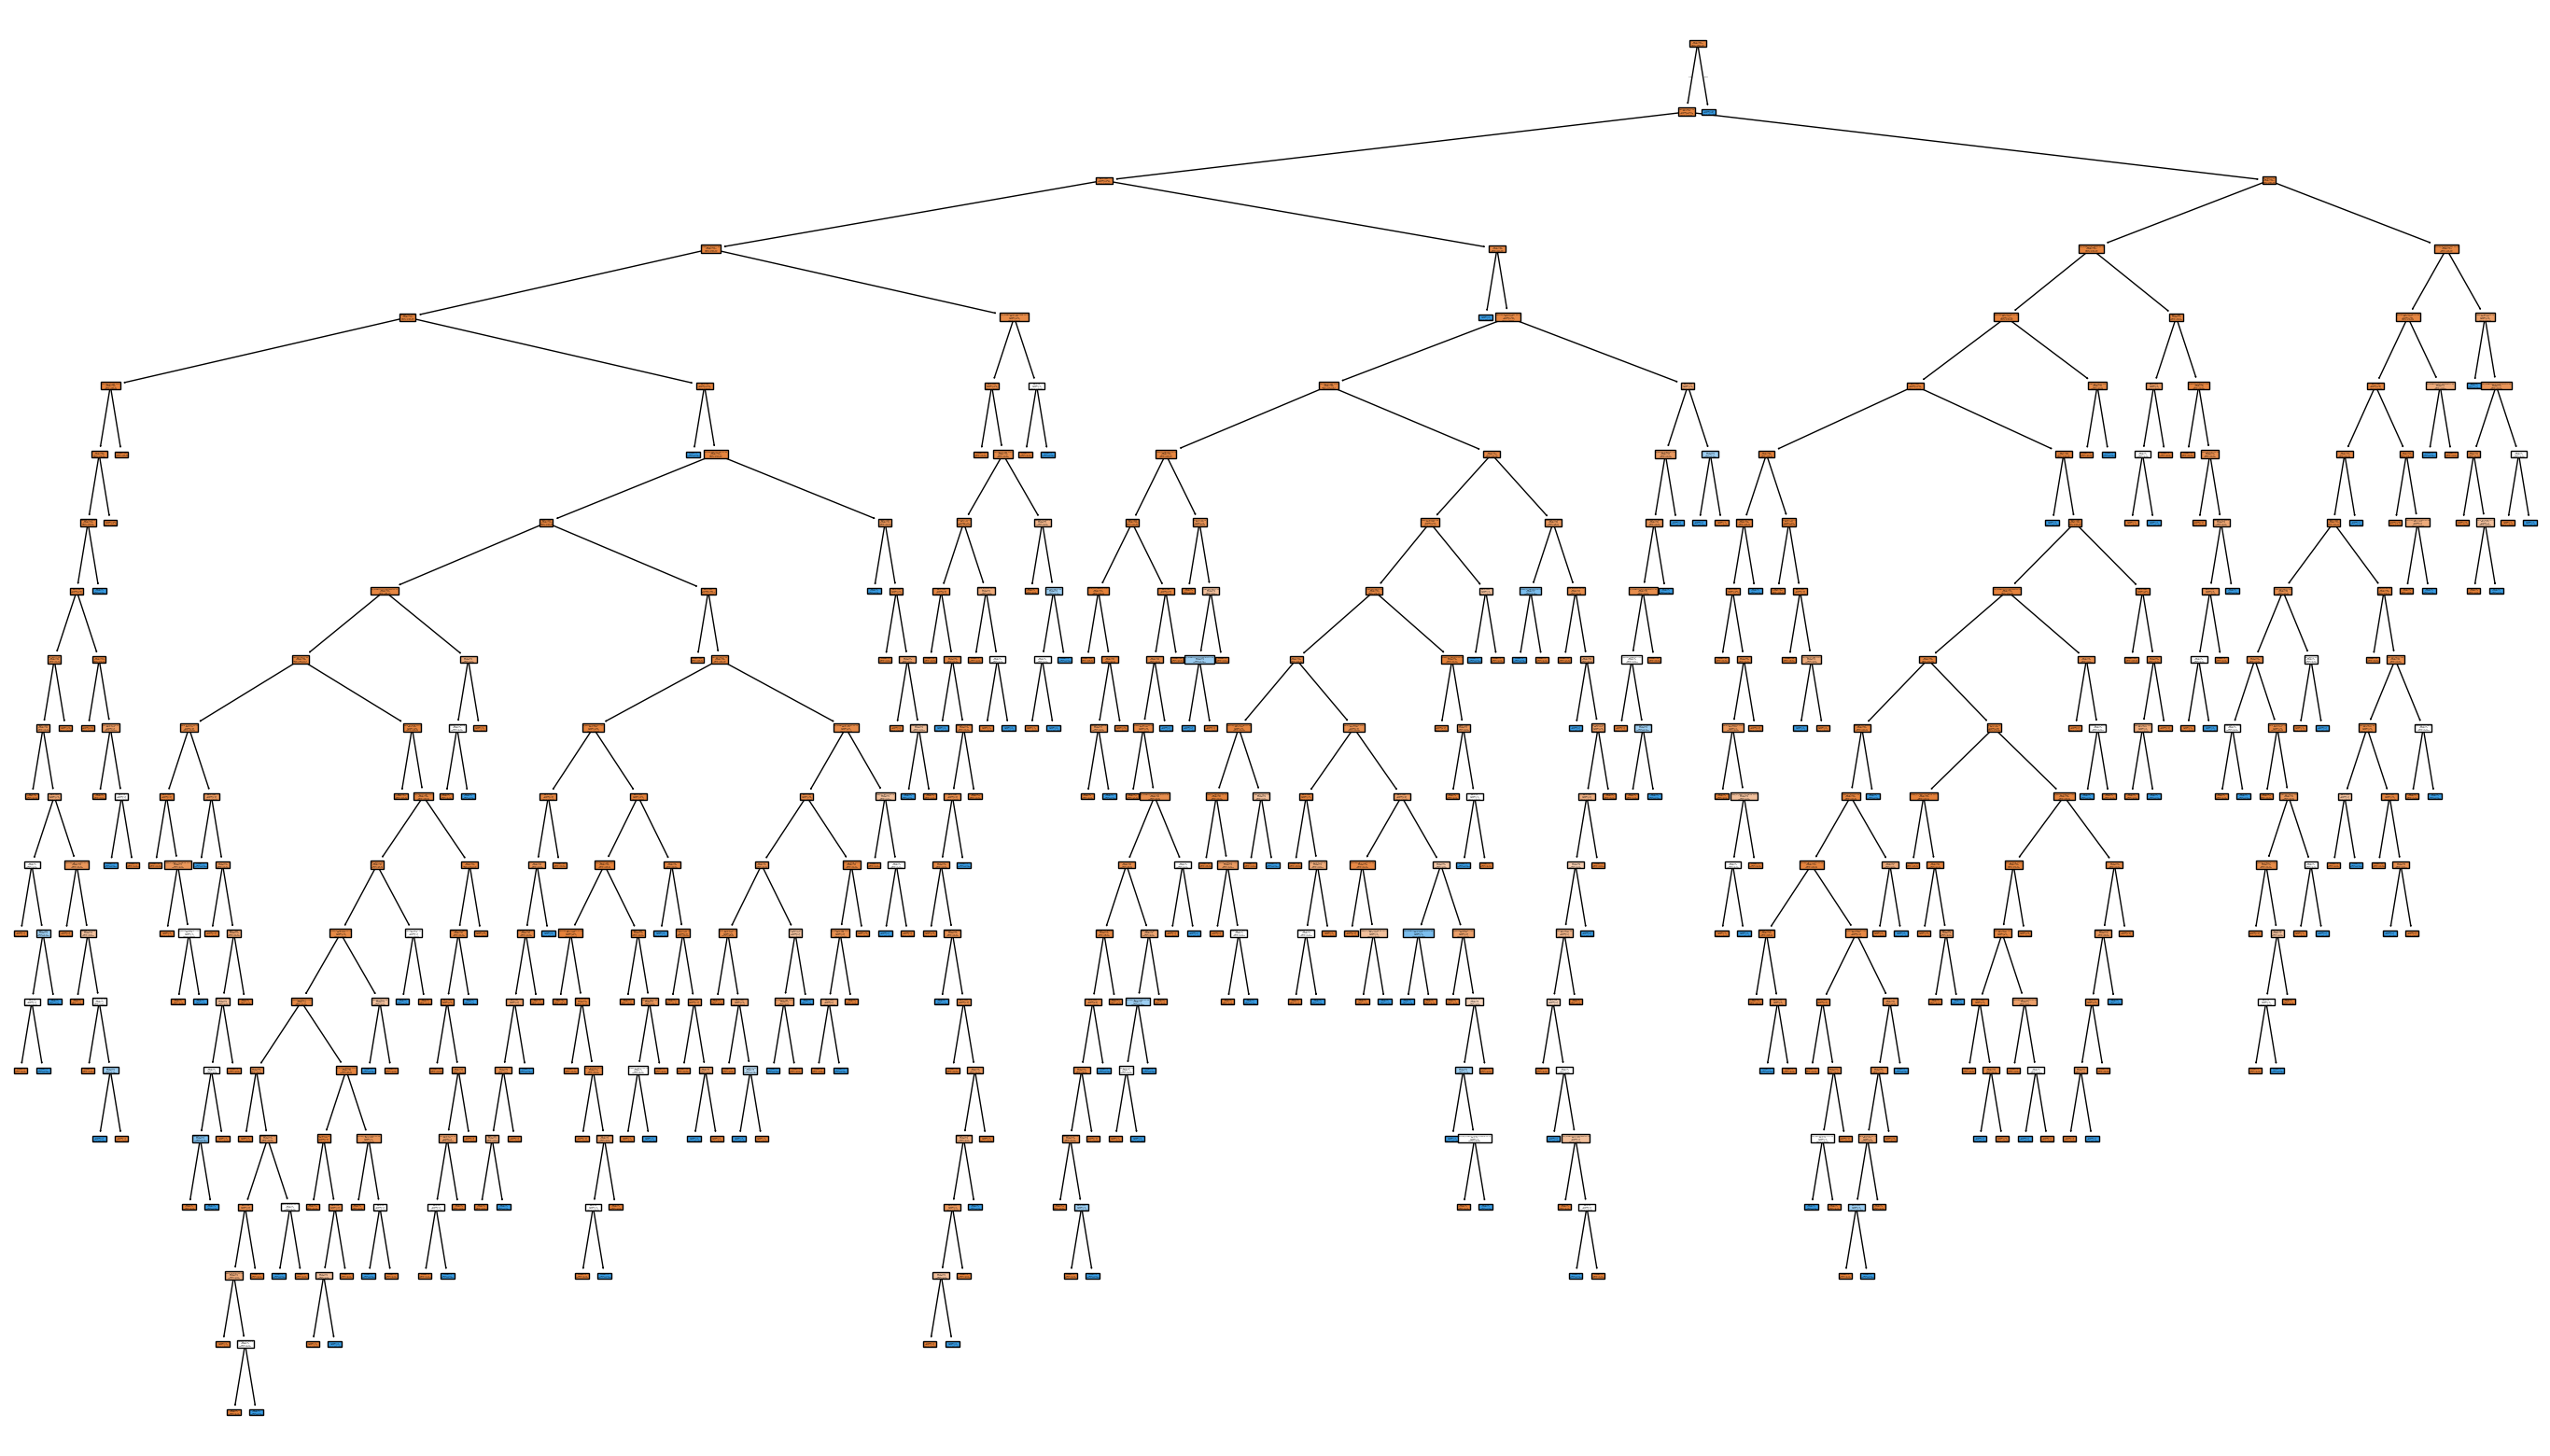

In [81]:
plt.figure(figsize=(35,20))
plot_tree(clf, filled=True, class_names= ['aprovados', 'reprovados'], feature_names=list(x.columns))

Vizualização da Matriz da confusão

In [82]:
predict = clf.predict(x_train)

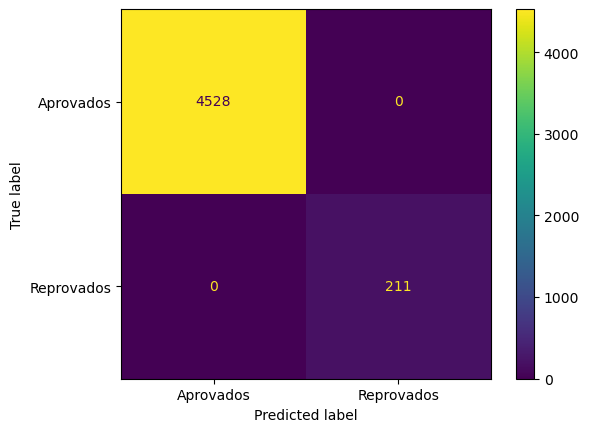

In [83]:
cm = confusion_matrix(y_train, predict, labels= clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=['Aprovados', 'Reprovados'])
MatrizDeConfusao.plot()

In [84]:
accuracy_score(predict, y_train)

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

Criação de matrix da confusão para exibir valores de teste do modelo

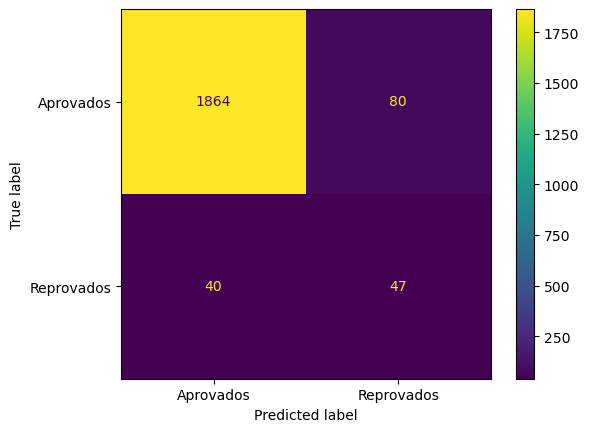

In [85]:
cm = confusion_matrix(y_test, clf.predict(x_test), labels= clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=['Aprovados', 'Reprovados'])
MatrizDeConfusao.plot()

Acurácia da base de testes e treinamento, comparação entre as duas

In [86]:
acuracia_testes = accuracy_score(clf.predict(x_test), y_test)
acuracia_testes

0.9409158050221565

In [87]:
acuracia_treino = accuracy_score(predict, y_train)
acuracia_treino

1.0

Diferença entre as duas

In [88]:
acuracia_treino - acuracia_testes

0.05908419497784345

Construção de uma nova árvore com as recomendações de profundidade máxima 10, mínimo de amostra nas folhas 5 e random_state de 123

In [89]:
clf_pre = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf_pre.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

Matrix da confusão de treino com nova árvore

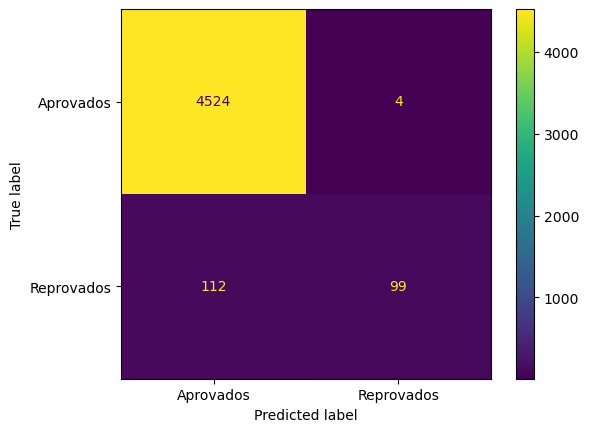

In [90]:
cm = confusion_matrix(y_train, clf_pre.predict(x_train), labels= clf_pre.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=['Aprovados', 'Reprovados'])
MatrizDeConfusao.plot()

Matrix da confusão de testes com nova árvore

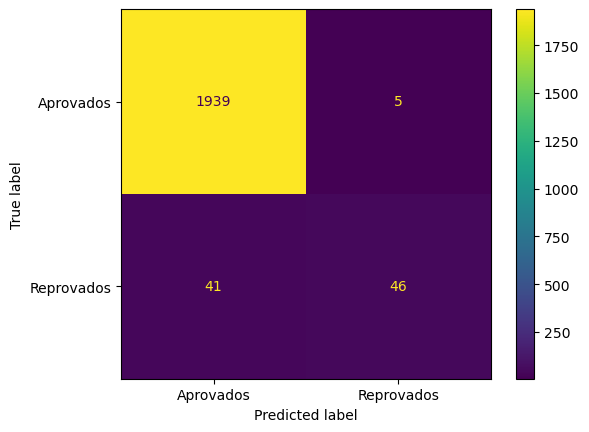

In [91]:
cm = confusion_matrix(y_test, clf_pre.predict(x_test), labels= clf_pre.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=['Aprovados', 'Reprovados'])
MatrizDeConfusao.plot()

Acurácia de nova árvore nos testes e treino

In [92]:
accuracy_score(clf_pre.predict(x_train), y_train)

0.9755222620806078

In [93]:
accuracy_score(clf_pre.predict(x_test), y_test)

0.9773510585918267

Proporção de proponentes classificados como maus pagadores

In [94]:
soma_de_todos_quadrantes = 1939 + 5 + 41 + 46
primeiro_quadrante = round((1939 / soma_de_todos_quadrantes)*100, 2)
segundo_quadrante = round((5 / soma_de_todos_quadrantes)*100, 2)
terceiro_quadrante = round((41 / soma_de_todos_quadrantes)*100, 2)
quarto_quadrante = round((46 / soma_de_todos_quadrantes)*100, 2)

relacoes_porcentuais = {'1°': primeiro_quadrante, '2°': segundo_quadrante, '3°': terceiro_quadrante, '4°': quarto_quadrante}
relacoes_porcentuais

{'1°': 95.47, '2°': 0.25, '3°': 2.02, '4°': 2.26}

In [95]:
predicao_de_maus_pagadores = segundo_quadrante + quarto_quadrante
predicao_de_maus_pagadores

2.51

Acurácia se todos os proponentes fossem dados como 'bons'

In [96]:
y_test.shape

(2031,)

In [97]:
y_train.shape

(4739,)

In [98]:
todos_bons_pagadores_treino = pd.Series([0]*4739)

In [99]:
todos_bons_pagadores_teste = pd.Series([0]*2031)

In [100]:
accuracy_score(todos_bons_pagadores_teste, y_test)

0.9571639586410635

In [101]:
accuracy_score(todos_bons_pagadores_treino, y_train)

0.9554758387845537